# Fraud Detection

## Description
The project is a fairly simple exporation of binary classification of fradulent and non-fraudlent transactions given a vector of unknown features. These features have already been transformed for us via PCA.

Dataset can be downloaded from kaggle at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## EDA
Lets start by loading in some common packages. Then I will load in the dataset and display the first few rows.

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


The columns V1-V28 seem to represent some data that we dont have the exact meaning to. 

Since this is a fraud detection, the classes are probably very unbalanced. Lets have a look at the class values.

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Lets also check the distribution of our other columns.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

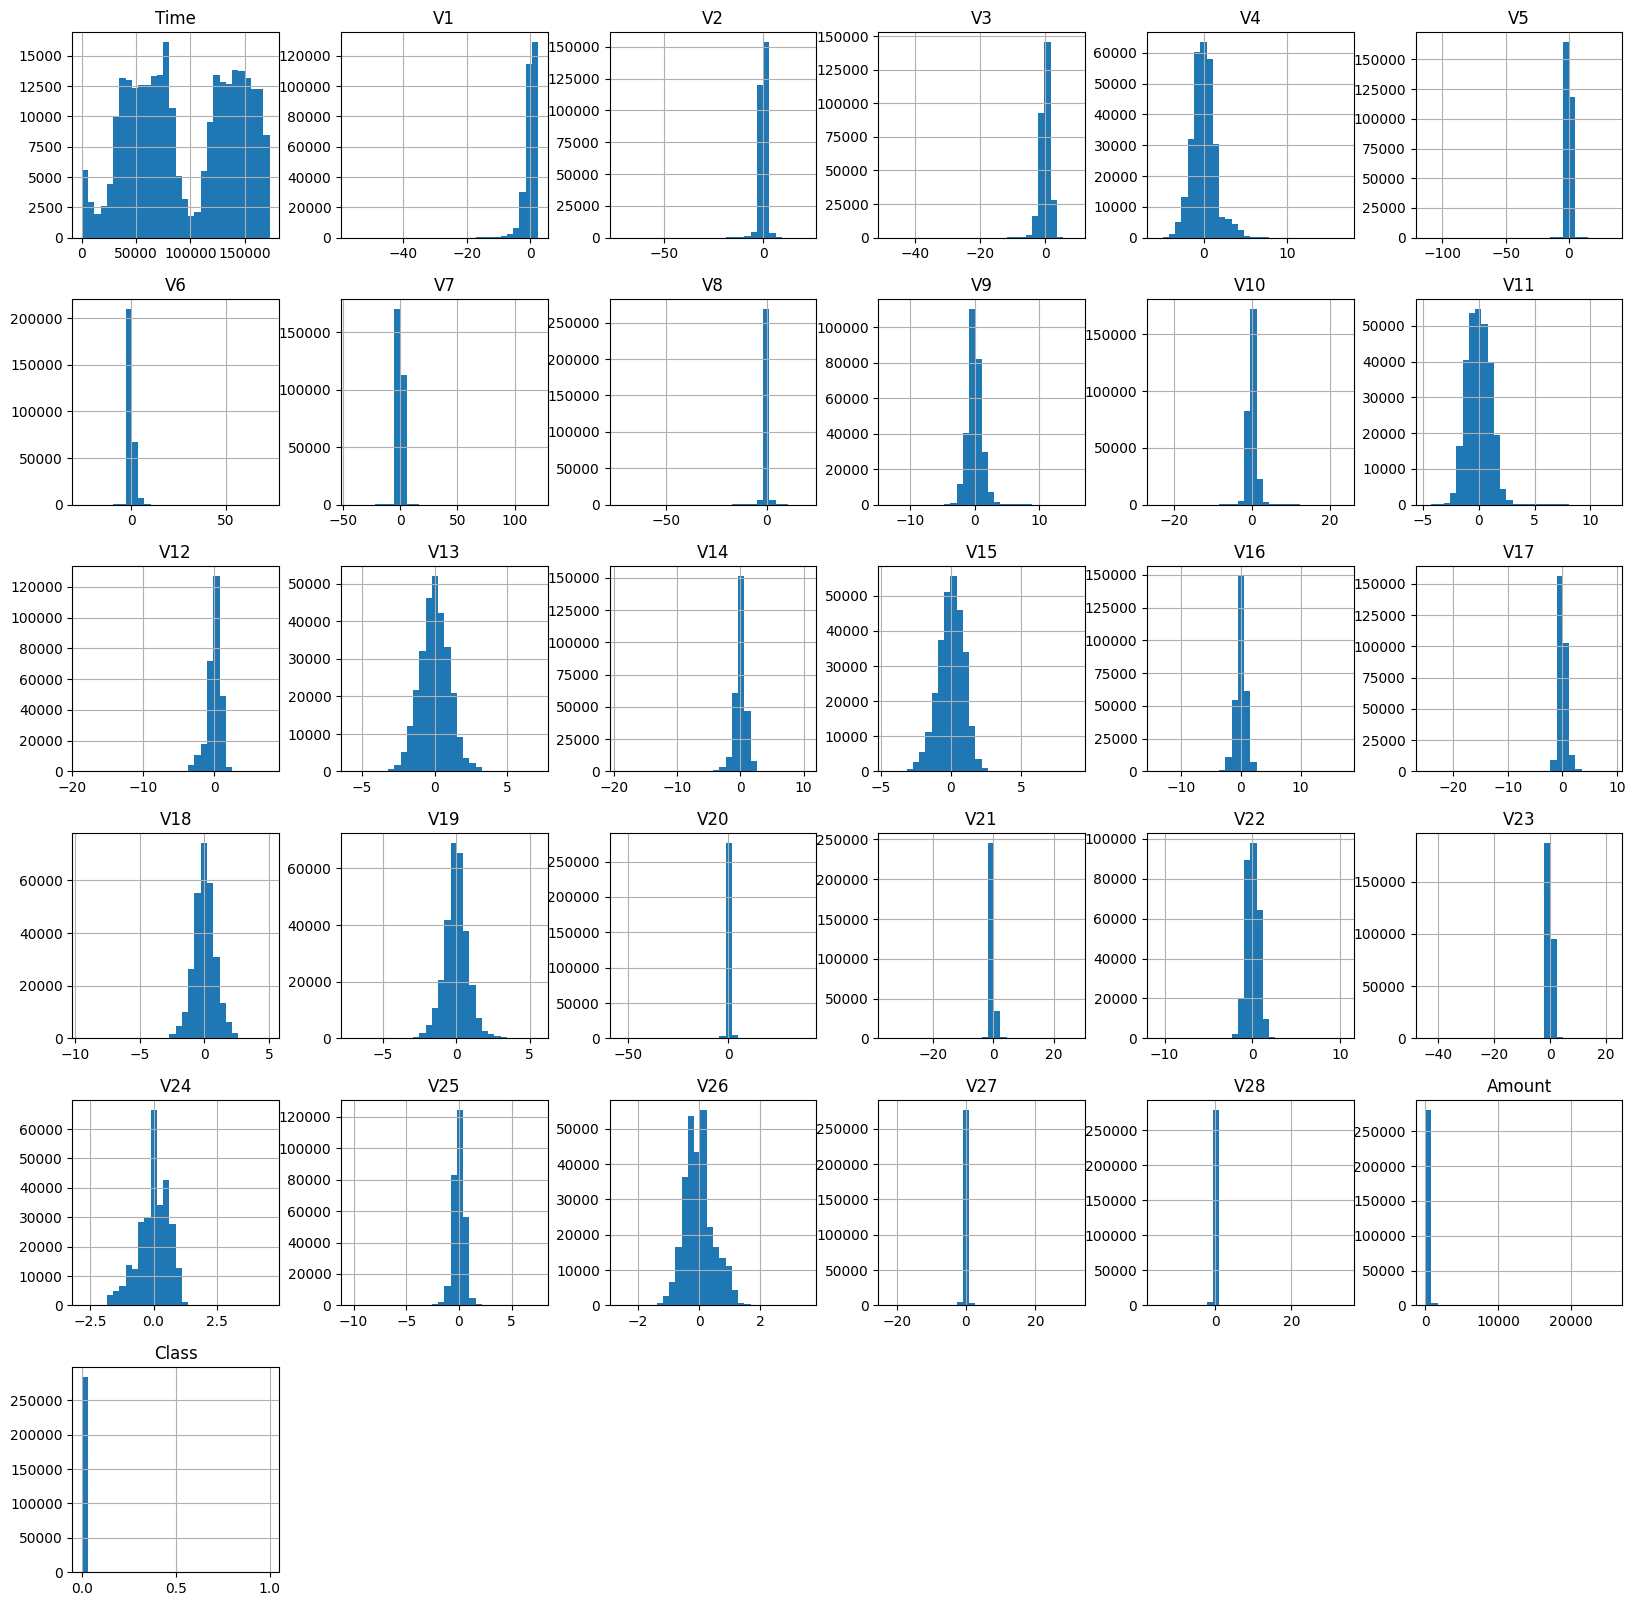

In [9]:
df.hist(bins=30, figsize=(20,20))

Most of our "V" columns are approx. normally distributed with different standard deviations, while the mean tends to sit around 0. The time distribution has a strange dip around 100,000, and amount and class (as expected) have most transactions being fairly low amounts, and a few larger ones (which are more likely to be fraud).

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The average transaction amount is around 88 dollars with a spread of 250 dolalrs. The largest transaction in this dataset is $25,691.16. Moreover, the average of 'Class' is 0.001727. In other words, we can say that 0.1727% of transactions in this database are fraudulent.

Lets also just check that there are no null values in our columns.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Looks clean. Now to check for outliers. 

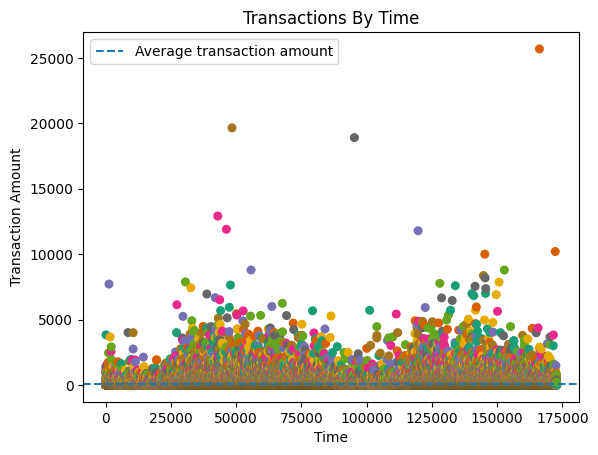

In [67]:
amounts = df['Amount'].to_numpy()
time = df['Time'].to_numpy()
avg_txn = np.mean(amounts)

colors = np.random.rand(len(amounts))
plt.scatter(time, amounts, s=30, c=colors, cmap='Dark2')
plt.axhline(avg_txn, linestyle='--', label="Average transaction amount")
plt.title("Transactions By Time")
plt.xlabel("Time")
plt.ylabel("Transaction Amount")
plt.legend()



Since amount has outliers way beyond the outer fences of our data (3*IQR), we will use the robust scalar from sklearn. The robust scaler will scale the data according to the IQR (distance from 25th and 75th percent of the dataset)

The time column has no outliers, so we can do a simple scaling method like a standard scale or a min max scale. We will do a standard scale.

Next, we shuffle the rows using the sample() method

In [40]:
from sklearn.preprocessing import RobustScaler, StandardScaler
df2 = df.copy()

# define the amount column to be the fit_transform method on the robus scalar class where the input
# to the method is a numpy array of our original df column, shaped to be a column vector
df2['Amount'] = RobustScaler().fit_transform(df2['Amount'].to_numpy().reshape(-1, 1))
df2['Time'] = StandardScaler().fit_transform(df2['Time'].to_numpy().reshape(-1, 1))

# shuffle rows
df2 = df2.sample(frac=1, random_state=1)
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.528409,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,-0.346905,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,-0.261789,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,-1.328689,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,-0.292513,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-1.329763,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,-0.422945,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,-0.836397,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,1.430131,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


Here I define what our test, train, validation split would be. Of course, the majority of our data will be used for training

In [41]:
train, test, val = df2[:240000], df2[240_000: 262_000], df2[262_000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

Next, I will take our dataframe splits and turn them into numpy arrays. Each of these arrays will have the previously specified amount of data points and 31 columns each.

In [42]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

Now, I must determine the X and y columns of our data (the independent features and the target feature).

In [43]:
X_train, y_train = train_np[:, :-1], train_np[:, -1]
X_test, y_test = test_np[:, :-1], test_np[:, -1]
X_val, y_val = val_np[:, :-1], val_np[:, -1]

Lets confirm that these are of the correct shape. The X arrays should have the first 30 columns, while the y array should simply be a column vector of the same amount of rows as the X train shape.

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape


((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

Now I will fit this data into a logistic regression model for binary classification.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

logistic_model = LogisticRegression() # create a new LogisticRegression object
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9992375

The model was scored with a very high accuracy. However, since this is an unbalanced dataset, it's important to check precision and recall as well.

In [46]:
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



The model gives us a near perfect accuracy of 100% for our validation set of points. This is likely because of the class imbalance in our data. Since there are so many "Not Fraud" data points, the model is mostly just going to assume not fraud for higher accuracy. 

Looking at our precision, recall, and f1-scores for Fraud, the values are much further from 100%. 
- Precision = TP / (TP + FP) --> measure of false positives
- Recall = TP / (TP + FN) --> measures of false negatives

Precision tells us how many of the Fraud transactions are actually fraud.
Recall tells us how many of the Fraud transactions we "spotted" (how many were missed and classified as false negative).

High accuracy means very little if the data is imbalanced...


Lets try a random forest with various depths.

I'll implemenet a simple driver function to run random forests at various depths for us.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def run_forest(start_depth, end_depth, step_size, X_train, y_train):
    for depth in range(start_depth, end_depth + step_size, step_size):
        rf = RandomForestClassifier(max_depth=depth, n_jobs=-1) # n-jobs simply tells the CPU to use all cores for faster computation
        rf.fit(X_train, y_train)
        print('------------------------------------------------------')
        print(f'For depth = {depth}')
        print('------------------------------------------------------')
        print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

run_forest(5, 1, 1, X_train, y_train)
run_forest(5, 25, 5, X_train, y_train)


------------------------------------------------------
For depth = 5
------------------------------------------------------
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.84      0.72      0.78        36

    accuracy                           1.00     22807
   macro avg       0.92      0.86      0.89     22807
weighted avg       1.00      1.00      1.00     22807

------------------------------------------------------
For depth = 10
------------------------------------------------------
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.87      0.75      0.81        36

    accuracy                           1.00     22807
   macro avg       0.94      0.87      0.90     22807
weighted avg       1.00      1.00      1.00     22807

------------------------------------------------------
For depth = 15
---------------------------

As the depths in our random forest gets higher, we actually see a fairly significant increase in all of our Fraud metrics. Looks like we cap out at around .81 for F1 score, but still not too bad.

Although random forest worked considerably better, it may not be computationally efficient to have these trees with large depths. 

Lets try undersampling for better model results.

First, we will seperate all values that are fraud and all values that are not by filtering the scaled dataframe.


In [48]:
fraud = df2[df2['Class'] == 1]
not_fraud = df2[df2['Class'] == 0]

In [49]:
df_undersampled = pd.concat([fraud, not_fraud.sample(len(fraud), random_state=1)])
df_undersampled = df_undersampled.sample(frac=1, random_state=1)
df_undersampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,-1.376890,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,-0.612488,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,1.243705,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,1.401660,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.895154,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,-0.754376,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,1.517626,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.584571,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,-1.266210,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


Now lets train, test, val, this time using sklearns method.

In [50]:
X = df_undersampled.to_numpy()[:, :-1]
y = df_undersampled.to_numpy()[:, -1]

X, y

(array([[-1.37689044e+00, -1.76259269e+00,  2.56142703e-01, ...,
          1.07049380e-01,  1.75922145e-01,  2.90644868e+00],
        [-6.12487813e-01,  1.22761441e+00, -6.68973794e-01, ...,
         -1.12827864e-03,  3.50745013e-02,  1.06211137e+00],
        [ 1.24370499e+00, -6.13695895e-01,  3.69877241e+00, ...,
          4.88409528e-01,  2.92344974e-01, -3.07412841e-01],
        ...,
        [ 5.84570920e-01,  1.97298867e+00,  1.57281255e-01, ...,
         -1.83738535e-02, -7.09107403e-02,  7.57353455e-02],
        [-1.26621000e+00, -2.43923697e+00,  2.59145816e+00, ...,
         -2.68649222e-01, -7.43712586e-01,  1.44344302e+00],
        [ 3.04984866e-01,  7.45153217e-01,  2.80929887e+00, ...,
          7.56952563e-01,  3.83868939e-01, -3.07412841e-01]]),
 array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
 

In [51]:
from sklearn.model_selection import train_test_split

# run first time to get 80% train 20% test
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=.2, random_state=1)

# run second time to get (80%)(25%) = 20% val, leaving us with 60% training data
X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=.25, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((590, 30), (590,), (197, 30), (197,), (197, 30), (197,))

Our value counts for Fraud/Not Fraud are fairly balanced now. Lets start with the logistic model.

In [52]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(X_train, y_train)
logistic_model_b.score(X_train, y_train)

0.9508474576271186

In [53]:
print(classification_report(y_val, logistic_model_b.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.93      0.91        92
       Fraud       0.94      0.89      0.91       105

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



Whlie we see a slightly lower accuracy overall, however, precision, recall, and f1-score skyrocketed above the 90% range. 

Lets have a look at random forests.

In [54]:
run_forest(1, 5, 1, X_train, y_train)
run_forest(5, 25, 5, X_train, y_train)

------------------------------------------------------
For depth = 1
------------------------------------------------------
              precision    recall  f1-score   support

   Not Fraud       0.84      1.00      0.91        92
       Fraud       1.00      0.83      0.91       105

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

------------------------------------------------------
For depth = 2
------------------------------------------------------
              precision    recall  f1-score   support

   Not Fraud       0.85      1.00      0.92        92
       Fraud       1.00      0.85      0.92       105

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

------------------------------------------------------
For depth = 3
-----------------------------

Our results for the random forest split is about the same, looking pretty good with f1 scores of about 90% for various tree depths.

From this we see that undersampling the data had a great effect on our metrics without sacrificing computation costs.